In [1]:
using Pkg; Pkg.activate("."); 
using StatsBase
using Revise
import MUST
using PyPlot
using Interpolations
using PyCall
using KernelDensity
using DelimitedFiles
using Printf

MUST.@import_dispatch "/u/peitner/DISPATCH/dispatch2"
MUST.@get_help visual;

  Activating environment at `/cobra/ptmp/peitner/model_grid/MUST.jl/examples/solar_model/Project.toml`


# Stagger Model

In [2]:
folder_stagger = "/ptmp/peitner/model_grid/MUST.jl/examples/stagger2bifrost"
stagger        = MUST.Box("box_solar_stagger_MARCS", folder=folder_stagger);
stagger_t      = MUST.Box("box_solar_stagger_MARCS_t", folder=folder_stagger);

# Final Model

In [3]:
folder = MUST.@in_dispatch("data/DIS_MARCS_v0.3.1_TDZ5")
snap   = 90
model, model_t = MUST.Boxes(folder, snaps=[snap]);

# Initial Model

In [4]:
eos_path = "input_data/DIS_MARCS_v0.3.1"
eos = MUST.SquareGasEOS(MUST.@in_dispatch(eos_path));

In [5]:
t_seed  = 10300.0
d_seed  = 2.85101827e-7
g_seed  = 2.75e4 
nz_seed = 400 
i0_seed = 100 
z0_seed = -0.15
ee_seed = exp(28.872019)

z,d,ee,t,p = MUST.initial_adiabat(eos, t_seed, d_seed, g_seed, ee_min=ee_seed/MUST.StaggerCGS().ee, nz=nz_seed, i0=i0_seed, z0_position=z0_seed);

# Comparison

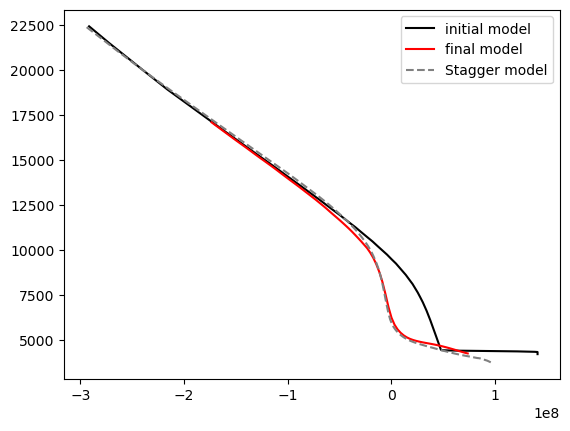

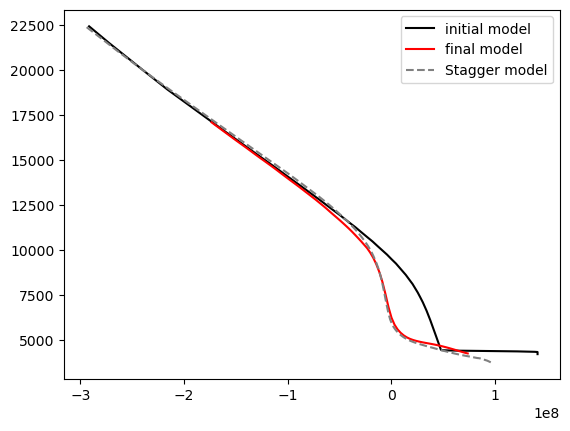

In [6]:
close()

plt.plot(z.*1e8, t, label="initial model", color="k")

x = MUST.axis(model, :z) 
y = MUST.plane_statistic(mean, model, :T)
plt.plot(x, y, label="final model", color="r")

x = MUST.axis(stagger, :z)
y = MUST.plane_statistic(mean, stagger, :T)
plt.plot(x, y, label="Stagger model", color="0.5", ls="--")

plt.legend()

gcf()

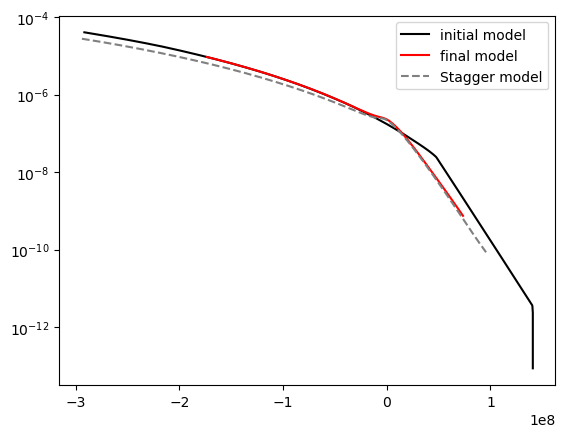

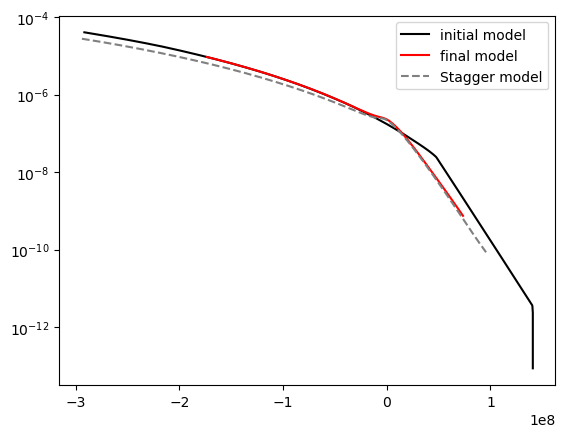

In [7]:
close()

plt.plot(z.*1e8, d, label="initial model", color="k")

x = MUST.axis(model, :z) 
y = MUST.plane_statistic(mean, model, :d)
plt.plot(x, y, label="final model", color="r")

x = MUST.axis(stagger, :z)
y = MUST.plane_statistic(mean, stagger, :d)
plt.plot(x, y, label="Stagger model", color="0.5", ls="--")

plt.legend()

plt.yscale("log")
gcf()